# Question 1

Introduction:
Special thanks to: https://github.com/justmarkham for sharing the dataset and 
materials.
Occupations


# Step 1.
Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np

# Step 2. 
Import the dataset from this address.

In [2]:
dataset = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'

# Step 3. 
Assign it to a variable called users

In [3]:
users = pd.read_csv(dataset, sep = '|')  # using \t to read and type 
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


# Step 4.
Discover what is the mean age per occupation


In [4]:
meanage = users.groupby(['occupation']).age.mean()
meanage

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

# Step 5.
Discover the Male ratio per occupation and sort it from the most to the least

In [6]:
def Male_occ(Sex):
    if Sex == 'M':
        return 1
    if Sex == 'F':
        return 0
users['gender_male'] = users['gender'].apply(Male_occ) 
Occ = users.groupby('occupation').gender_male.sum()
Occ.sort_values(ascending = False)

occupation
student          136
educator          69
other             69
engineer          65
programmer        60
administrator     43
executive         29
scientist         28
technician        26
writer            26
librarian         22
marketing         16
entertainment     16
artist            15
retired           13
lawyer            10
salesman           9
doctor             7
healthcare         5
none               5
homemaker          1
Name: gender_male, dtype: int64

# Step 6.
For each occupation, calculate the minimum and maximum ages

In [7]:
occ_m = users.groupby('occupation').age.agg(['min', 'max'])
occ_m

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


# Step 7.
For each combination of occupation and sex, calculate the mean age

In [56]:
occ_s = users.groupby(['occupation', 'gender']).age.mean()
occ_s

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

# Step 8.
For each occupation present the percentage of women and men

In [61]:
C_gen = users.groupby(['occupation', 'gender']).agg({'gender': 'count'})
O_count = users.groupby(['occupation']).agg('count')
F_Per = C_gen.div(O_count, level = "occupation")
Per_S = F_Per*100
Per_S.loc[: , 'gender']

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

# Question 2
Euro Teams
# Step 1. 
Import the necessary libraries

In [8]:
import pandas as pd
import numpy as np

# Step 2.
Import the dataset from this address

In [9]:
dataset2 ='https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv' 

# Step 3. 
Assign it to a variable called euro12

In [10]:
euro12 = pd.read_csv(dataset2, sep = ',')

# Step 4. 
Select only the Goal column

In [74]:
goal = euro12.loc[:,['Goals']]
goal

,Goals
0,4
1,4
2,4
3,5
4,3
5,10
6,5
7,6
8,2
9,2


# Step 5.
How many team participated in the Euro2012?

In [81]:
n_team = euro12.count(axis = 0)
n_team.head(1)

Team    16
dtype: int64

# Step 6. 
What is the number of columns in the dataset?

In [84]:
shape = euro12.shape
print('Number of columns :', shape[1])

Number of columns : 35


# Step 7.
View only the columns Team, Yellow Cards and Red Cards and assign them 
to a dataframe called discipline

In [86]:
discipline = euro12[['Team','Yellow Cards','Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


# Step 8.
Sort the teams by Red Cards, then to Yellow Cards


In [89]:
cards = discipline.sort_values(by= ['Red Cards','Yellow Cards'],ascending=False)
cards

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


# Step 9. 
Calculate the mean Yellow Cards given per Team

In [95]:
discipline = discipline.rename(columns={"Yellow Cards":"Yellow_Cards"})
discipline.groupby(['Team']).Yellow_Cards.mean()

Team
Croatia                 9
Czech Republic          7
Denmark                 4
England                 5
France                  6
Germany                 4
Greece                  9
Italy                  16
Netherlands             5
Poland                  7
Portugal               12
Republic of Ireland     6
Russia                  6
Spain                  11
Sweden                  7
Ukraine                 5
Name: Yellow_Cards, dtype: int64

In [97]:
mean_y = discipline['Yellow_Cards'].mean()
mean_y

7.4375

# Step 10.
Filter teams that scored more than 6 goals

In [100]:
more_s = euro12[euro12['Goals']>6]
more_s

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


# Step 11. 
Select the teams that start with G

In [101]:
team_g = euro12[euro12.Team.str.startswith('G')]
team_g

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


# Step 12.
Select the first 7 columns

In [102]:
column_s = euro12.iloc[:,0:7]
column_s

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


# Step 13. 
Select all columns except the last 3

In [103]:
except_t = euro12.iloc[:,:-3]
except_t

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


# Step 14.
Present only the Shooting Accuracy from England, Italy and Russia

In [104]:
shoot_acc = euro12.loc[euro12.Team.isin(['England', 'Italy', 'Russia']), ['Team','Shooting Accuracy']]
shoot_acc

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3
Housing
# Step 1.
Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import random

# Step 2.
Create 3 different Series, each of length 100, as follows:

• The first a random number from 1 to 4

In [26]:
data = pd.Series(np.random.randint(1,5,size=(100)))

• The second a random number from 1 to 3

In [27]:
data_1 = pd.Series(np.random.randint(1,4,size=(100)))

• The third a random number from 10,000 to 30,000

In [29]:
data_2 = pd.Series(np.random.randint(10000,30001,size=(100)))

# Step 3.
Create a DataFrame by joinning the Series by column

In [30]:
df_1 = pd.DataFrame(data, columns=['series_1'])
df_2 = pd.DataFrame(data_1, columns=['series_2'])
df_3 = pd.DataFrame(data_2, columns=['series_3'])

In [31]:
df = df_1.join(df_2)

In [32]:
df_rename = df.join(df_3)

In [33]:
df_rename

,series_1,series_2,series_3
0,3,2,17479
1,1,3,20171
2,2,3,23258
3,3,2,23794
4,3,2,15366
...,...,...,...
95,1,3,24583
96,4,1,22938
97,3,1,23396
98,2,1,17233


# Step 4.
Change the name of the columns to bedrs, bathrs, price_sqr_meter

In [34]:
df_rename = df_rename.rename(columns={"series_1":"bedrs"})
df_rename = df_rename.rename(columns={"series_2":"bathrs"})
df_rename = df_rename.rename(columns={"series_3":"price_sqr_meter"})


In [35]:
df_rename

,bedrs,bathrs,price_sqr_meter
0,3,2,17479
1,1,3,20171
2,2,3,23258
3,3,2,23794
4,3,2,15366
...,...,...,...
95,1,3,24583
96,4,1,22938
97,3,1,23396
98,2,1,17233


# Step 5. 
Create a one column DataFrame with the values of the 3 Series and assign it to 'bigcolumn'

In [58]:
dfbig = pd.concat([data,data_1,data_2])
bigcol = pd.DataFrame(dfbig, columns=['bigcolumn'])

In [59]:
bigcol

,bigcolumn
0,3
1,1
2,2
3,3
4,3
...,...
95,24583
96,22938
97,23396
98,17233


# Step 6.
Ops it seems it is going only until index 99. Is it true?

# yes,
the index is going to 99

# Step 7.
Reindex the DataFrame so it goes from 0 to 299

In [67]:
bigcol.index = pd.RangeIndex(start=0, stop=300)
bigcol

,bigcolumn
0,3
1,1
2,2
3,3
4,3
...,...
295,24583
296,22938
297,23396
298,17233


# Question 4
Wind Statistics 
The data have been modified to contain some missing values, identified by NaN.
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or 
other looping construct.
The data in 'wind.data' has the following format:
Yr Mo Dy RPT VAL ROS KIL SHA BIR DUB CLA MUL CLO BEL 
MAL
61 1 1 15.04 14.96 13.17 9.29 NaN 9.87 13.67 10.25 10.83 12.58 18.50 15.04
61 1 2 14.71 NaN 10.83 6.50 12.62 7.67 11.50 10.04 9.79 9.67 17.54 13.83
61 1 3 18.50 16.88 12.33 10.13 11.17 6.17 11.25 NaN 8.50 7.67 12.75 12.71
The first three columns are year, month, and day. The remaining 12 columns are 
average windspeeds in knots at 12 locations in Ireland on that day.


# Step 1.
Import the necessary libraries

In [229]:
import numpy as np
import pandas as pd
import datetime

# Step 2.
Import the dataset from this address

In [230]:
load_data = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data'

# Step 3.
Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

In [231]:
data = pd.read_csv(load_data, sep = "\s+",parse_dates=[[0,1,2]])

In [232]:
data

,Yr_Mo_Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


# Step 4.
Year 2061? Do we really have data from this year? Create a function to fix it 
and apply it.

In [233]:
def year61_fix(y):
    year =y.year-100 if y.year > 1978 else y.year
    return datetime.date(year,y.month,y.day)
data['Yr_Mo_Dy']=data['Yr_Mo_Dy'].apply(year61_fix)

# Step 5.
Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [234]:
data['Yr_Mo_Dy']=pd.to_datetime(data['Yr_Mo_Dy'])
data=data.set_index('Yr_Mo_Dy')

In [235]:
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
Yr_Mo_Dy,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


# Step 6.
Compute how many values are missing for each location over the entire record.They should be ignored in all calculations below

In [236]:
data.isnull().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

In [237]:
data = data-data.isnull()      #To ignore in all further calculations 

# Step 7. 
Compute how many non-missing values there are in total.


In [238]:
non_miss = data.shape[0]-data.isnull().sum()
non_miss

RPT    6568
VAL    6571
ROS    6572
KIL    6569
SHA    6572
BIR    6574
DUB    6571
CLA    6572
MUL    6571
CLO    6573
BEL    6574
MAL    6570
dtype: int64

# Step 8.
Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
A single number for the entire dataset.

In [239]:
mean_wind = data.mean().mean()
mean_wind

10.227982360836924

# Step 9.
Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds
at each location over all the days
A different set of numbers for each location.

In [240]:
mindata = pd.DataFrame(data.min(), columns=['min'])
maxdata = pd.DataFrame(data.max(), columns=['max'])
meandata = pd.DataFrame(data.mean(), columns=['mean'])
stddata = pd.DataFrame(data.std(), columns=['standard deviations'])


In [241]:
df = mindata.join(maxdata)
df_1 = df.join(meandata)
loc_stats = df_1.join(stddata)

In [242]:
loc_stats

,min,max,mean,standard deviations
RPT,0.67,35.80,12.362987,5.618413
VAL,0.21,33.37,10.644314,5.267356
ROS,1.50,33.84,11.660526,5.008450
KIL,0.00,28.46,6.306468,3.605811
SHA,0.13,37.54,10.455834,4.936125
BIR,0.00,26.16,7.092254,3.968683
DUB,0.00,30.37,9.797343,4.977555
CLA,0.00,31.08,8.495053,4.499449
MUL,0.00,25.88,8.493590,4.166872
CLO,0.04,28.21,8.707332,4.503954


# Step 10. 
Create a DataFrame called day_stats and calculate the min, max and mean 
windspeed and standard deviations of the windspeeds across all the locations at each 
day.
A different set of numbers for each day

In [243]:
mindata1 = pd.DataFrame(data.min(axis=1), columns=['min'])
maxdata1 = pd.DataFrame(data.max(axis=1), columns=['max'])
meandata1 = pd.DataFrame(data.mean(axis=1), columns=['mean'])
stddata1 = pd.DataFrame(data.std(axis=1), columns=['standard deviations'])

In [244]:
df = mindata1.join(maxdata1)
df_1 = df.join(meandata1)
day_stats = df_1.join(stddata1)

In [245]:
day_stats

,min,max,mean,standard deviations
Yr_Mo_Dy,,,,
1961-01-01,9.29,18.50,13.018182,2.808875
1961-01-02,6.50,17.54,11.336364,3.188994
1961-01-03,6.17,18.50,11.641818,3.681912
1961-01-04,1.79,11.75,6.619167,3.198126
1961-01-05,6.17,13.33,10.630000,2.445356
...,...,...,...,...
1978-12-27,8.08,40.08,16.708333,7.868076
1978-12-28,5.00,41.46,15.150000,9.687857
1978-12-29,8.71,29.58,14.890000,5.756836


# Step 11.
Find the average windspeed in January for each location.
Treat January 1961 and January 1962 both as January.

In [246]:
data['date']=data.index
data['month']=data['date'].apply(lambda date:date.month)
data['year']=data['date'].apply(lambda date:date.year)
data['day']=data['date'].apply(lambda date:date.day)
avg_january=data.query('month==1')
avg_january.loc[:,'RPT':'MAL'].mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

# Step 12. 
Downsample the record to a yearly frequency for each location

In [247]:
fre_l = data.query('month == 1 and day == 1')
fre_l 

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date,month,year,day
Yr_Mo_Dy,,,,,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01,1,1961,1
1962-01-01,9.29,3.42,11.54,3.50,2.21,1.96,10.41,2.79,3.54,5.17,4.38,7.92,1962-01-01,1,1962,1
1963-01-01,15.59,13.62,19.79,8.38,12.25,10.00,23.45,15.71,13.59,14.37,17.58,34.13,1963-01-01,1,1963,1
1964-01-01,25.80,22.13,18.21,13.25,21.29,14.79,14.12,19.58,13.25,16.75,28.96,21.00,1964-01-01,1,1964,1
1965-01-01,9.54,11.92,9.00,4.38,6.08,5.21,10.25,6.08,5.71,8.63,12.04,17.41,1965-01-01,1,1965,1
1966-01-01,22.04,21.50,17.08,12.75,22.17,15.59,21.79,18.12,16.66,17.83,28.33,23.79,1966-01-01,1,1966,1
1967-01-01,6.46,4.46,6.50,3.21,6.67,3.79,11.38,3.83,7.71,9.08,10.67,20.91,1967-01-01,1,1967,1
1968-01-01,30.04,17.88,16.25,16.25,21.79,12.54,18.16,16.62,18.75,17.62,22.25,27.29,1968-01-01,1,1968,1
1969-01-01,6.13,1.63,5.41,1.08,2.54,1.00,8.50,2.42,4.58,6.34,9.17,16.71,1969-01-01,1,1969,1


# Step 13.
Downsample the record to a monthly frequency for each location.


In [248]:
mon_f = data.query('day == 1')
mon_f

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,date,month,year,day
Yr_Mo_Dy,,,,,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961-01-01,1,1961,1
1961-02-01,14.25,15.12,9.04,5.88,12.08,7.17,10.17,3.63,6.50,5.50,9.17,8.00,1961-02-01,2,1961,1
1961-03-01,12.67,13.13,11.79,6.42,9.79,8.54,10.25,13.29,NaN,12.21,20.62,NaN,1961-03-01,3,1961,1
1961-04-01,8.38,6.34,8.33,6.75,9.33,9.54,11.67,8.21,11.21,6.46,11.96,7.17,1961-04-01,4,1961,1
1961-05-01,15.87,13.88,15.37,9.79,13.46,10.17,9.96,14.04,9.75,9.92,18.63,11.12,1961-05-01,5,1961,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1978-08-01,19.33,15.09,20.17,8.83,12.62,10.41,9.33,12.33,9.50,9.92,15.75,18.00,1978-08-01,8,1978,1
1978-09-01,8.42,6.13,9.87,5.25,3.21,5.71,7.25,3.50,7.33,6.50,7.62,15.96,1978-09-01,9,1978,1
1978-10-01,9.50,6.83,10.50,3.88,6.13,4.58,4.21,6.50,6.38,6.54,10.63,14.09,1978-10-01,10,1978,1


# Step 14.
Downsample the record to a weekly frequency for each location.

In [261]:
data_week = data[data.index < pd.to_datetime('1978')]
data_week.resample('W').sum()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,month,year,day
Yr_Mo_Dy,,,,,,,,,,,,,,,
1961-01-01,15.04,14.96,13.17,9.29,0.00,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1,1961,1
1961-01-08,94.79,68.92,73.41,44.92,66.32,45.05,77.43,39.70,59.04,59.48,87.37,92.67,7,13727,35
1961-01-15,87.28,62.77,83.71,32.41,51.46,35.51,52.75,47.74,39.99,53.00,77.88,77.17,7,13727,84
1961-01-22,92.43,69.04,90.88,44.30,53.80,51.92,64.80,55.13,50.02,56.87,68.75,80.04,7,13727,133
1961-01-29,119.28,112.99,127.58,89.04,122.03,103.80,108.70,106.12,101.36,109.48,146.51,157.71,7,13727,182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1977-12-04,110.83,96.52,102.51,38.16,74.50,67.10,85.54,69.48,57.55,61.79,81.18,119.29,81,13839,97
1977-12-11,100.01,81.71,107.05,45.04,71.55,68.08,99.55,82.30,75.66,73.87,93.62,157.87,84,13839,56
1977-12-18,60.38,66.84,61.43,20.13,48.24,39.05,59.04,49.30,47.38,42.60,69.16,91.87,84,13839,105


# Step 15.
Calculate the min, max and mean windspeeds and standard deviations of the 
windspeeds across all locations for each week (assume that the first week starts on 
January 2 1961) for the first 52 weeks.

In [262]:
mindata = pd.DataFrame(data_week.min(), columns=['min'])
maxdata = pd.DataFrame(data_week.max(), columns=['max'])
meandata = pd.DataFrame(data_week.mean(), columns=['mean'])
stddata = pd.DataFrame(data_week.std(), columns=['Standard deviation'])

<ipython-input-262-3ecf4b721224>:3: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



In [263]:
df = mindata.join(maxdata)
df_1 = df.join(meandata)
df2 = df_1.join(stddata)
df2

,min,max,mean,Standard deviation
RPT,0.67,35.8,12.354669,5.594253
VAL,0.37,33.37,10.620791,5.240315
ROS,1.5,33.84,11.677023,5.005807
KIL,0,28.46,6.319653,3.601345
SHA,0.13,37.54,10.472805,4.930752
BIR,0,26.16,7.059428,3.967062
DUB,0,30.37,9.815458,4.961625
CLA,0,31.08,8.477094,4.492142
MUL,0,25.88,8.458527,4.163962
CLO,0.04,28.21,8.731181,4.516808


# Question 5

# Step 1.
Import the necessary libraries


In [78]:
import pandas as pd
import numpy as np

# Step 2.
Import the dataset from this address.

In [79]:
dataset = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

# Step 3.
Assign it to a variable called chipo.

In [80]:
chipo = pd.read_csv(dataset,sep = '\t')

# Step 4.
See the first 10 entries

In [81]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


# Step 5.
What is the number of observations in the dataset?


In [82]:
len(chipo.count(axis = 1))

4622

# Step 6.
What is the number of columns in the dataset?


In [83]:
len(chipo.columns)

5

# Step 7.
Print the name of all the columns

In [84]:
list(chipo.columns)

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']

# Step 8.
How is the dataset indexed?

In [85]:
print(chipo.index)

RangeIndex(start=0, stop=4622, step=1)


# Step 9.
Which was the most-ordered item?

In [86]:
sum_item = chipo.groupby('item_name').sum()
for_qua = sum_item.sort_values(['quantity'], ascending=False)
for_qua.head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


# Step 10. 
For the most-ordered item, how many items were ordered?

In [87]:
most_ordered = for_qua.head(1)
most_ordered['quantity']

item_name
Chicken Bowl    761
Name: quantity, dtype: int64

# Step 11.
What was the most ordered item in the choice_description column?

In [88]:
des_item = chipo.groupby('choice_description').sum()
acc_qua = des_item.sort_values(['quantity'], ascending=False)
acc_qua.head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


# Step 12.
How many items were orderd in total?

In [89]:
print(chipo.quantity.sum())

4972


# Step 13.
• Turn the item price into a float

In [95]:
turn_f = chipo.item_price.str.replace('$','')    # removing dollar sign

• Check the item price type

In [97]:
chipo['item_price'].dtype

dtype('O')

• Create a lambda function and change the type of item price

In [91]:
dollar_fuc = lambda x: float(x[1:-1])
chipo.item_price = chipo.item_price.apply(dollar_fuc)

• Check the item price type

In [90]:
chipo.item_price.dtypes

dtype('float64')

# Step 14. 
How much was the revenue for the period in the dataset?

In [100]:
mul = (chipo.quantity * chipo.item_price)
rev = mul.sum()
rev

39237.02

# Step 15. 
How many orders were made in the period?


In [95]:
gp_count = chipo['order_id'].value_counts()
orders_p = gp_count.count()
orders_p

1834


# Step 16.
What is the average revenue amount per order?

In [98]:
gp_avg = chipo.groupby(by=['order_id'])
sum1 = gp_avg.sum()
sum1.item_price.mean()

18.81142857142869

# Step 17.
How many different items are sold?

In [97]:
sold_it = chipo['item_name'].value_counts()
items = sold_it.count()
print(items)

50


# Question 6
Create a line plot showing the number of marriages and divorces per capita in the 
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!


In [184]:
import pandas as pd

In [185]:
data_md = pd.read_csv('us-marriages-divorces-1867-2014.csv')
linedata = data_md[['Year','Marriages_per_1000','Divorces_per_1000']]
data = linedata.set_index(['Year'])   # to avoid index 0 to 144 and get years on x-axis
data1 = data.head(145)

Text(0, 0.5, 'Count of marriages and divorces')

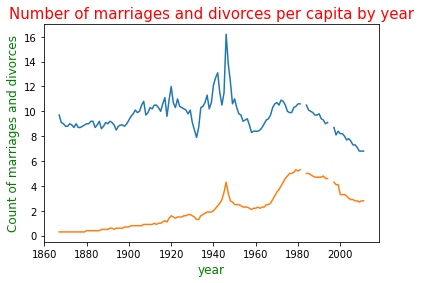

In [219]:
import matplotlib.pyplot as plt
%matplotlib inline
columns = data1.columns
x_data = linedata.Year
fig, ax = plt.subplots()
for column in columns:
    ax.plot(x_data, data1[column])
ax.set_title('Number of marriages and divorces per capita by year',color="red",fontsize=15)
ax.set_xlabel('year',color="green",fontsize=12)
ax.set_ylabel('Count of marriages and divorces',color="green",fontsize=12)    

# Question 7
Create a vertical bar chart comparing the number of marriages and divorces per 
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

Text(0, 0.5, 'Marriages and divorces per capita')

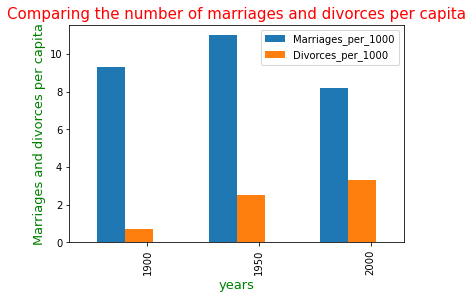

In [218]:
data_yr = data_md[data_md['Year'].apply(lambda x: x in [1900, 1950, 2000])]
per_capita = data_yr[['Marriages_per_1000','Divorces_per_1000']]
years = data_yr['Year'].values
per_capita.plot(kind="bar")
plt.title("Comparing the number of marriages and divorces per capita",color="red",fontsize=15)
plt.xticks([i + 0.2 for i in range(3)], ['1900', '1950', '2000'])
plt.xlabel("years",color="green",fontsize=13)
plt.ylabel("Marriages and divorces per capita",color="green",fontsize=13)

# Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort 
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!

In [190]:
import pandas as pd
actor_data = pd.read_csv('actor_kill_counts.csv')


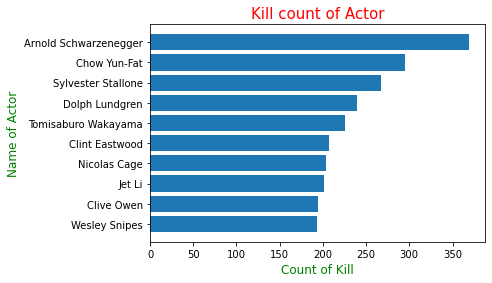

In [215]:
sort_data = actor_data.sort_values(by=['Count'])
plt.barh(sort_data['Actor'], sort_data['Count'])    
plt.ylabel("Name of Actor",color="green",fontsize=12)
plt.xlabel("Count of Kill",color="green",fontsize=12)
plt.title("Kill count of Actor",color="red",fontsize=15)
plt.show()

# Question 9
Create a pie chart showing the fraction of all Roman Emperors that were 
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the 
percentage breakdown of the categories.


In [194]:
import numpy as np 
import pandas as pd 
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
# matplotlib
import matplotlib.pyplot as plt


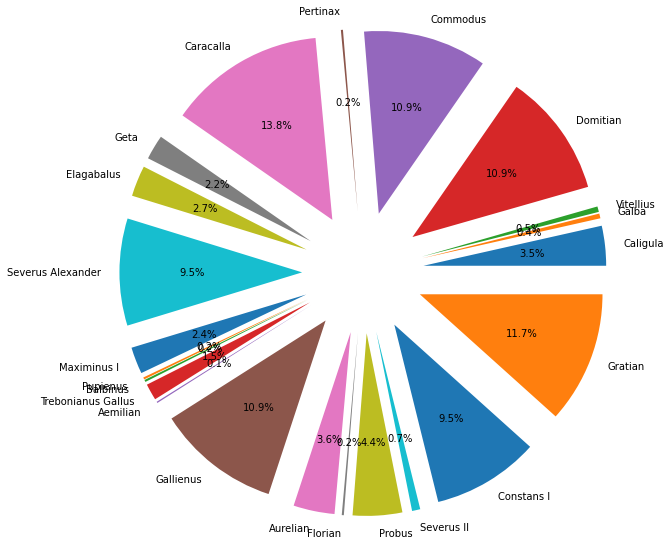

In [198]:
roman_data = pd.read_csv('roman-emperor-reigns.csv')
roman_new = roman_data[roman_data['Cause_of_Death'] == 'Assassinated']
ass_data = roman_new['Length_of_Reign']
mylabels = roman_new.Emperor
myexplode = (0.4, 0.4, 0.4, 0.4,0.4, 0.4, 0.4, 0.4,0.4, 0.4, 0.4, 0.4,0.4, 0.4, 0.4, 0.4,0.4, 0.4, 0.4, 0.4,0.4, 0.4)# just for clear visuals
fig = plt.figure(figsize =(10, 7))
plt.pie(ass_data , labels=mylabels, explode = myexplode, autopct='%1.1f%%' ,radius=0.02 * 60)

plt.show() 


# Question 10
Create a scatter plot showing the relationship between the total revenue earned by 
arcades and the number of Computer Science PhDs awarded in the U.S. between 
2000 and 2009.
Don't forget to label your axes!
Color each dot according to its year

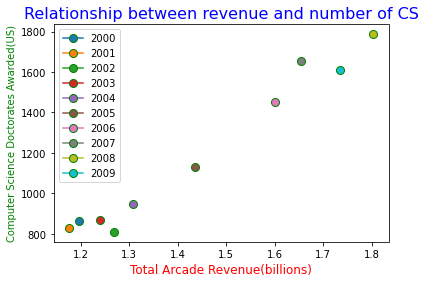

In [213]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
df = df.rename(columns={"Total Arcade Revenue (billions)":"TAR"})
df = df.rename(columns={"Computer Science Doctorates Awarded (US)":"CSDA"})  # renaming columns
grpyrs = df.groupby('Year')                                                  # plot scatter
for name, group in grpyrs:
    plt.plot(group.TAR, group.CSDA, marker='o', mec = 'g', markersize=8, label=name)
plt.legend()
plt.title("Relationship between revenue and number of CS",color="blue",fontsize=16)
plt.xlabel("Total Arcade Revenue(billions)",color="red",fontsize=12)
plt.ylabel("Computer Science Doctorates Awarded(US)",color="green",fontsize=10)
plt.show()